# <font color="red"> Resolução de exercícios de MBA em IA e Big Data</font>
## <span style="color:red">Disciplina de Estatística em Python</span>

## Exercícios de Resumo de Dados, Probabilidade e Regressão 

*Adriano Viana Bednaski*<br>

In [1]:
#Importando a biblioteca Pandas para analisar o dataset
import pandas as pd 

In [3]:
#O dataset utilizado chama-se Felicidade que foi disponibilizado pela disciplina 
dfFelicidade = pd.read_csv("Felicidade.csv")

In [5]:
#Olhando como são as features e uma visão geral dos dados
print(dfFelicidade.info(), dfFelicidade.columns.values) # imprime as informações dos dados e os nomes das features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

<span style="color:blue">  Q1. O conjunto de dados Felicidade.csv traz dados referentes a um escore de felicidade (Ladder scorel) em diferentes países do mundo em 2020. Os países estão agrupados em 8 regiões diferentes do mundo (Regional indicators). Calcule o escore médio de felicidade entre os países de cada região e selecione as regiões que tem menor média e maior média, respectivamente.<br>
**A. Sub-Saharan Africa e North America and ANZ;**  mean = 4.38 and 7.17<br>
B. Western Europe e Central and Eastern Europe;<br>
C. North America and ANZ e Sub-Saharan Africa<br>
D. South Asia e Sub-Saharan Africa.<span>

In [7]:
#Respondendo a questão 1
dfMean = dfFelicidade.groupby(['Regional indicator'])['Ladder score'].mean() #Agrupa os dados e fornece as médias 
dfMean.sort_values() # organiza as ordens das médias de forma ascendente


Regional indicator
Sub-Saharan Africa                    4.383495
South Asia                            4.475443
Middle East and North Africa          5.227159
Commonwealth of Independent States    5.358342
Southeast Asia                        5.383367
East Asia                             5.714850
Central and Eastern Europe            5.883818
Latin America and Caribbean           5.981786
Western Europe                        6.899219
North America and ANZ                 7.173525
Name: Ladder score, dtype: float64

<span style="color:blue"> Q2. Foram calculadas 5 componentes principais, combinações lineares de algumas variáveis observadas, para estudar quais possivelmente explicam o escore de felicidades (Laddes score) da população dos países. As componentes foram nomeadas como:<br>
1) Renda per capita (Logged GDP per capita),<br>
2) Suporte social (Social support),<br>
3) Expectativa de vida (Healthy life expectancy),<br>
4) Liberdade (Freedom to make life choices) e<br>
5) Generosidade (Generosity)<br>

 'Explained by: Social support' 
 'Explained by: Healthy life expectancy'
 'Explained by: Freedom to make life choices' 
 'Explained by: Generosity'
 'Explained by: Perceptions of corruption'
 
 <span style="color:blue">Das 5 componentes principais, as duas menos correlacionadas com o escore de felicidade são (escolha uma ou mais):<br>
**A. Liberdade**<br>
B. Renda per capita <br>
C. Expectativa de vida<br>
D. Suporte social<br>
**E. Generosidade**<span>

In [8]:
#Respondendo a questão 2
dfFelizDimen = dfFelicidade[['Ladder score', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
            'Generosity', 'Logged GDP per capita']] # Seleciona apenas os dados de dimensão e escore do dataset Felicidade
dfFelizDimen.corr() # calcula as correlações entre as features

,Ladder score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Logged GDP per capita
Ladder score,1.000000,0.765001,0.770316,0.590597,0.069043,0.775374
Social support,0.765001,1.000000,0.742744,0.478863,-0.056780,0.781814
Healthy life expectancy,0.770316,0.742744,1.000000,0.448846,-0.071852,0.848469
Freedom to make life choices,0.590597,0.478863,0.448846,1.000000,0.253721,0.419019
Generosity,0.069043,-0.056780,-0.071852,0.253721,1.000000,-0.118399
Logged GDP per capita,0.775374,0.781814,0.848469,0.419019,-0.118399,1.000000


<span style="color:blue"> Q3. Um estudo para verificar quais as componentes mais associadas ao escore de felicidade obteve um modelo final de regressão linear múltiplo com as seguintes variáveis explicativas: Renda per capita, Suporte social, Expectativa de vida e Liberdade (modelo sem interação). Analisando os resultados desse modelo, responda se as afirmações a seguir são Verdadeiras ou Falsas.<br>    
(**V**) O modelo explica quase 74% da variabilidade total do escore de felicidade.<br> 
(**F**) As variáveis renda e expectativa de vida são negativamente associadas ao escore de felicidade.<br> 
(**V**) A análise de resíduos identifica uma tendência na distribuição dos resíduos em função dos preditores.</span>
<span style='color:red'>**P<br></span>
<span style='color:blue'>(*V*)Osresíduos não apresentam um desvio importante da distribuição normal.</span>


In [9]:
#Renomeando as features do dataset com as dimensões para diminuir os nomes
dfFelizDimen.rename(columns = {'Social support': 'SS','Healthy life expectancy': 'H', 'Freedom to make life choices': 'F', 'Generosity': 'G', 'Logged GDP per capita': 'GDP','Ladder score': 'score' }, inplace = True)


/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
#x.drop(x.tail(1).index,inplace=True)
#dfFelizDimen.isna() #Vê se tem algum valor faltante

In [13]:
# Fazendo a Regressão linear multipla usando a bibioteca stasmodels
import statsmodels.api as sm #importa a biblioteca
Fx = dfFelizDimen['score'] # separa o dataset para Fx (ou Y)  
x = dfFelizDimen[['SS','H','F','GDP']] #separa o dataset em x (preditoras)
x = sm.add_constant(x,prepend = False) # adiciona uma feature com constante no modelo (Interpto) #poderia ser esse comando tb: spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
model2 = sm.OLS(Fx,x) #cria o modelo
Reg2 = model2.fit() # ajusta a resgressão aos dados 
Reg2.summary() # para ter acesso a tudo que pode ser apresentado dir(Reg2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           9.00e-42
Time:                        10:36:48   Log-Likelihood:                -131.02
No. Observations:                 153   AIC:                             272.0
Df Residuals:                     148   BIC:                             287.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SS             2.4049      0.657      3.660      0.000       1.106       3.703
H              0.0386      0.013      2.949      0.004       0.013       0.064
F              2.3266      0.460      5.054      0.000       1.417       3.236
GDP            0.2398      0.082      2.933      0.004       0.078       0.401
const         -3.0104      0.454     -6.631      0.000      -3.908      -2.113
==============================================================================
Omnibus:                        5.121   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.738
Skew:                          -0.421   Prob(JB):                       0.0936
Kurtosis:                       3.189   Cond. No.                         950.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Responde a questão 3 com outra forma mas agora escrevendo o modelo ao invés de serarar em dataset Fx e x
from statsmodels.formula.api import ols #importa o modelo Ordinary Least Square

#Ajusta o modelo de regressão linear múltipla com formula ols
mod = ols('score ~ SS + H + F + GDP',data=dfFelizDimen)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     103.1
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           9.00e-42
Time:                        10:39:02   Log-Likelihood:                -131.02
No. Observations:                 153   AIC:                             272.0
Df Residuals:                     148   BIC:                             287.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0104      0.454     -6.631      0.0

In [17]:
#analisando se existe relação entre Resíduos da Regressão e as preditoras por meio de correlação 
dfFelizReg = dfFelizDimen
dfFelizReg['Resid'] = res.resid
dfFelizReg.corr()
#pela correlação não se percebe relacão linear de Person entre os preditores e os resíduos

/tmp/ipykernel_31/3937616056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFelizReg['Resid'] = res.resid


,score,SS,H,F,GDP,Resid
score,1.000000,7.650008e-01,7.703163e-01,5.905968e-01,7.753744e-01,5.139024e-01
SS,0.765001,1.000000e+00,7.427441e-01,4.788632e-01,7.818136e-01,3.662703e-15
H,0.770316,7.427441e-01,1.000000e+00,4.488462e-01,8.484686e-01,2.143656e-15
F,0.590597,4.788632e-01,4.488462e-01,1.000000e+00,4.190186e-01,1.990752e-15
GDP,0.775374,7.818136e-01,8.484686e-01,4.190186e-01,1.000000e+00,2.164136e-15
Resid,0.513902,3.662703e-15,2.143656e-15,1.990752e-15,2.164136e-15,1.000000e+00


In [18]:
#Analisando através de teste Shapiro-Wilks a normalidade dos resíduos 
from scipy import stats #importa a biblioteca com testes estatísticos
# Teste de Shapiro-Wilks para normalidade
print(stats.shapiro(res.resid))

#Pelo resultado não se pode afirmar que os resíduos se diferem estatísticamente de uma distribuição gaussina (normal)

ShapiroResult(statistic=0.9878631234169006, pvalue=0.20559336245059967)


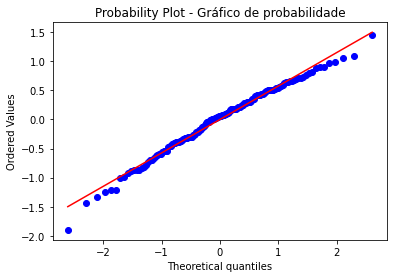

<Figure size 432x288 with 0 Axes>

In [22]:
#Analisando visualmente a normalidade dos resíduos 
import matplotlib.pyplot as plt #importa a bibliote para desenhar gráficos
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(res.resid, plot=plt) #desenha o gráfico
plt.title('Probability Plot - Gráfico de probabilidade')# renomea o gráfico
fig = plt.figure()

#visualmente parece os dados terem uma tendência a diferencar da distribuição gaussina (normal) nos extremos. 
#Porém, pelo teste Shapiro-Wilks essa diferença não é suficente para se afirmar que os resídos não seguem uma distribuição gaussiana centrada no 0

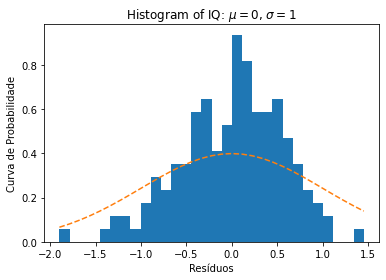

In [42]:
#Analisando visualmente a normalidade dos resíduos através do histograma
import numpy as np #importa a biblioteca Numpy para gerar o ajuste da Normal no histograma

colunas = 30 #quantidade de coluna do histograma

fig, ax = plt.subplots()
n, colunas , patches = ax.hist(res.resid, colunas , density=True) #desenha o histograma dos resíduos



# adiciona uma linha de ajuste da Normal no histograma
mu = 0 #média teórica dos resíduos que deve ser 0
sigma =1 #devio padrão teórico dos resíduos que seria 1
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (colunas - mu))**2))
ax.plot(colunas, y, '--')
ax.set_xlabel('Resíduos')
ax.set_ylabel('Curva de Probabilidade')
ax.set_title(r'Histogram of IQ: $\mu=0$, $\sigma=1$')

plt.show()

#VISUALMENTE OS RESÍDUOS NÃO ESTÃO BEM CENTRADOS NO 0, PARECENDO TER UMA ASSIMETRIA 

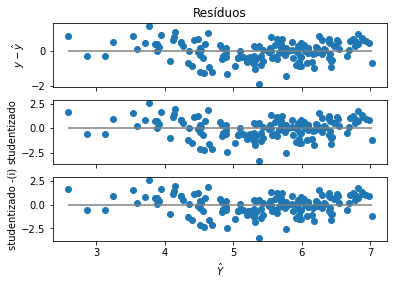

In [45]:
# GRÁFICO DOS RESÍDUOS
# valores preditos da esperança de Y - E(Y)
ypred=res.fittedvalues

# resíduo = observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

####--------------------------------

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()
    
    
#PARECE HAVER PONTOS EXTREMOS DOS RESÍDUOS OBSERVANDO O RESÍDUO STUDENTIZADO, POR TER VALORES ACIMA DE 2

<span style="color:blue"> Q4. No dia 15 de abril de 1912, o Titanic afundou após colidir um iceberg em sua viagem inaugural (um breve resumo pode ser encontrado em Link Wikipedia). Com os dados de uma amostra dos passageiros do Titanic, apresentados no arquivo de dados titanic.csv. Pode-se pensar em vários testes de hipóteses para fazer uma análise comparativa da tarifa paga pela passagem entre os sobreviventes e não sobreviventes. Quatro deles estão listados abaixo. Quais são os níveis descritivos (p-valores) obtidos a partir de cada um deles? <br>
A. Teste t de Student para variâncias diferentes **Ttest_indResult(statistic=6.809905589504408, pvalue=3.233336282255795e-11)** <br>
B. Teste de Mann-Whitney **MannwhitneyuResult(statistic=128812.0, pvalue=8.614270910587372e-22)** ESSE VALOR NAO BATEU<br>
C. Teste de Levene para comparação de variâncias **LeveneResult(statistic=44.42127908056298, pvalue=4.652781213477435e-11)** <br>
D. Na busca por outros fatores potencialmente associados com sobreviver ou não ao
naufrágio, o teste Qui-quadrado para comparação das distribuições de gênero foi
realizado, resultando em um nível descritivo de **estatistica X2: 258.3912607678978; p-valor: 3.847574039733745e-58** <br>
E. Determine a razão entre as tarifas médias pagas pelos não sobreviventes em relação
aos sobreviventes é igual a **0.45889858432814984**


In [46]:
#Respondendo a questão 4
dfTitanic =  pd.read_csv("titanic.csv") #Como já foi importado o Pandas eu não preciso importar novamente; 
print(dfTitanic.info(), dfTitanic.columns.values) #olhando o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None ['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'Siblings/Spouses Aboard'
 'Parents/Children Aboard' 'Fare']


In [47]:
# testes estatísticos com a bibioteca spicy
from scipy import stats
import numpy as np 

In [50]:
#separa os dados dos sobreviventes (survived) e mortos (died) e seleciona os valores das tarifas
survived = dfTitanic.loc[dfTitanic.Survived == 1,'Fare']
died = dfTitanic.loc[dfTitanic.Survived ==0, 'Fare']

In [51]:
# teste t de Student (bicaudal) para média de duas populações Normais com variâncias diferente
print('média de ticket dos sobriventes: %.2f ; média de ticket dos mortos: %.3f'%(survived.mean(),died.mean())) #Não consegui usar o .f para arredondar 
print(f'média de ticket dos sobriventes: {round(survived.mean(),2)} ; média de ticket dos mortos: {round(died.mean(),3)}')

stats.ttest_ind(survived,died, equal_var = False) #teste t

#PELOS RESULTADO DO TESTE HÁ DIFERENÇA ENTRE O VALOR PAGO PELOS TICKETS PARA OS SOBREVIVENTE E MORTOS NOS PASSAGEIROS DO TITANIC. 
#SENDO QUE PARA OS SOBREVIVENTES O VALOR PAGO FOI EM MÉDIA DE 48.4 E PARA OS MORTOS O VALOR MÉDIO FOI DE 22.20

média de ticket dos sobriventes: 48.40 ; média de ticket dos mortos: 22.209
média de ticket dos sobriventes: 48.4 ; média de ticket dos mortos: 22.209


Ttest_indResult(statistic=6.809905589504408, pvalue=3.233336282255795e-11)

In [60]:
# teste de mediana de  Mann-Whitney
from statistics import median
sobrev = np.array(survived)
mortos = np.array(died)

print(f'mediana de ticket dos sobreviventes: {median(sobrev)}; mediana de ticket dos mortos {median(mortos)}')
      
testM= stats.mannwhitneyu(sobrev, mortos, use_continuity=True, alternative= "greater")
print(testM)

#PELO TESTE A MEDIADA DOS TICKETS DE 26 DOS SOBREVIVENTES É SIGNIFICATIVAMENTE MAIOR QUE A DE 10.5 DOS MORTOS

mediana de ticket dos sobreviventes: 26.0; mediana de ticket dos mortos 10.5
MannwhitneyuResult(statistic=128812.0, pvalue=4.307135455293686e-22)


In [174]:
#teste de Levene para igualdade de variâncias
stats.levene(survived,died)

LeveneResult(statistic=44.42127908056298, pvalue=4.652781213477435e-11)

In [199]:
# fazendo o teste qui-quadrado para a quantidade de sobreviventes e mortos em relação ao sexo
from scipy.stats import chi2_contingency
# teste quiquadrado para independência/hamogeneidade de distribuição
X2 = pd.crosstab(dfTitanic.Survived, dfTitanic.Sex)
chi2, p, dof, expected = chi2_contingency(X2)
print(f'estatistica X2: {chi2}; p-valor: {p}')

#DE ACORDO COM O TESTE HÁ DEPENDÊNCIA ENTRE O SEXO DA PESSOA E A PROBABILIDADE E SOBREVIVÊNCIA

estatistica X2: 258.3912607678978; p-valor: 3.847574039733745e-58


In [525]:
#relação da média dos ticketes dos preços pagos pelos mortos em relação ao sobreviventes
round(died.mean()/survived.mean(), 2)

# ISSO MOSTRA QUE O PREÇO DOS TICKETS DOS MORTOS VALEM 46% DO DOS SOBREVIVENTES

0.46

<span style="color:blue"> Q5. Para estudar conjuntamente os fatores associados à sobrevivência no naufrágio, um modelo de regressão logística foi ajustado considerando as seguintes covariáveis: classe do bilhete (Pclass), idade (Age), parentes presentes no navio (SSAboard) e gênero (C(Sex)). Quais são os valores dos coeficientes associados a cada uma das covariáveis? <br>
(Considere 3 casas decimais) <br>
A. Classe do bilhete<br>
B. Idade <br>
C. Parentes presentes no navio <br> 
D. Gênero

In [71]:
#Respondendo a questão 5
import pandas as pd 
import numpy as np
#import statsmodels.api as sm #parece ser igual a import statsmodels.discrete.discrete_model as sm
import statsmodels.discrete.discrete_model as sm #importando a o modelo de regressão logística do statsmodel

In [124]:
#Fazendo a regressão logística para a questão 5
FxTitanic = dfTitanic['Survived'] #separa o dataset para o Fx
xTitanic = dfTitanic[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Sex']] #separa o dataset com as preditoras

In [125]:
xTitanic = pd.concat([xTitanic,pd.get_dummies(xTitanic['Sex'], prefix='Sex',drop_first=False)],axis=1)
xTitanic.drop(['Sex'],axis=1, inplace=True) #Retira a coluna original com as variáveis nomiais
modelLog = sm.Logit(FxTitanic,xTitanic) #,family=sm.families.Binomial()
Reg3 = modelLog.fit()
Reg3.summary()

Optimization terminated successfully.
         Current function value: 0.441305
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            4
Date:                Sun, 28 Nov 2021   Pseudo R-squ.:                  0.3381
Time:                        12:54:13   Log-Likelihood:                -391.44
converged:                       True   LL-Null:                       -591.38
Covariance Type:            nonrobust   LLR p-value:                 2.932e-85
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Pclass                     -1.2651      0.127     -9.960      0.000      -1.514      -1.016
Age                        -0.0437      0.008     -5.679      0.000      -0.059      -0.029
Siblings/Spouses Aboard    -0.4078      0.105     -3.876      0.000      -0.614      -0.202
Sex_female                  5.5321      0.505     10.960      0.000       4.543       6.521
Sex_male                    2.7956      0.450      6.215      0.000       1.914       3.677
===========================================================================================
"""

In [121]:
#TENTEI IMPLEMENTAR ESSA PARA VER SE O COEFICIENTE DO SEX MODIFICA O VALOR MAS NÃO ACONTECEU
#Fazendo a regressão logística para a questão 5
#FxTitanic = dfTitanic['Survived'] #separa o dataset para o Fx
#xTitanic = dfTitanic[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Sex']]
#xTitanic['Sex'] = xTitanic['Sex'].map({'female':0,'male':1})
#modelLog = sm.Logit(FxTitanic,xTitanic)
#Reg3 = modelLog.fit()
#Reg3.summary()

In [126]:
dados =Reg3.predict([1,38,1,0,1])
print(dados)

array([0.36869416])

<span style="color:blue">Q6. Considerando o modelo de regressão logística ajustado com as covariáveis classe do bilhete (Pclass), idade (Age), parentes presentes no navio (SSAboard) e gênero (C(Sex)). Responda se as afirmações a seguir são Verdadeiras ou Falsas. <br>
(**F**) Quanto maior classe do bilhete, maior chance de sobreviver ao naufrágio.<br>
(**V**) Quanto menor a idade, maior chance de sobreviver ao naufrágio.<br>
(**F**) Quanto menos parentes presentes no navio, menor chance de sobreviver ao naufrágio.<br> 
(**F**) Todas as covariáveis influenciam positivamente à chance de sobreviver ao naufrágio.<br>

**<font color="red"> Respondendo a questão 6:<br>
1: "Falsa" pois o coeficiente é negativo, isso indica uma relação inversa entre a feature e o valor da predição;<br>
2: "Verdadeira" pois o coefieciente é negativo, isso indica que um valor mais alto na feature reduz o resultado de F(x) - y;<br>
3: "Falsa" pois o coefeficiente é negativo<br>
4: "Falsa" pois existe features que impactam negaticamente na predição </font>**

<span style="color:blue">Q7. Ao invés de usar a metodologia sofisticada da Teoria de Resposta ao Item, o conhecimento do aluno poderia ser representado pelo número de acertos na prova com 45 questões, para cada área. Essa variável aleatória “número de acertos no total de 45 questões” possivelmente segue qual das seguintes distribuições de probabilidade? <br> 
a) Bernoulli<br>
**b) Binomial** <BR>
c) Normal <br>
d) Exponencial <br>
e) Poisson

**<font color="red"> Respondendo a questão 7:
Um evento qualquer que tem apenas 2 possibilidades de respostas: Sucesso ou Fracasso. Trata-se de uma distribuição de Bernoulli. Nessa situação, acertar ou errar questão é um evento de Bernoulli, porém, ao combinar vários eventos de Bernoulli, tem-se uma distribuição Binomial.**

<span style="color:blue">Q8. Na prova de 45 questões de uma das áreas,qual a probabilidade de um aluno que não sabe nada (ou seja, escolhe aleatoriamente uma das 5 alternativas de respostas de cada questão) acertar mais da metade da prova? Marque todas as opções corretas (pode ser mais de uma). <br>
a) 0,223 <br>
**b) 𝑃(𝑌 > 22,5), sendo Y, o número de acertos na prova, uma variável aleatória com
distribuição Normal de média 9 e desvo padrão 2,68, aproximadamente.**<br>
**c) 3,28.10−6 = 0,00000328** <br>
d) 0,223 . 0,822 <br>
e) 0,2 

A aproximação da binomial(45, p = 0,2)  para a normal(m = 0,2*45,desv.padr = 0,2*0,8*45)

In [128]:
#Respondendo a questão 8
m = 0.2*45
dp = (0.2*0.8*45)**0.5
print(f'A média esperada para a aproximação da distribuição normal: {m}; com o desvio padrão: {round(dp, 2)}')

A média esperada para a aproximação da distribuição normal: 9.0; com o desvio padrão: 2.68


In [21]:
#Respondendo a questão 8
from scipy import special as sc
n =45
k = 22
dif = 45 - 22
#sc.factorial(5, exact=True)
sc.comb(n, k, exact=True)*(0.2**(dif)) # resposta da letra C; pelo gabarito a conta esta cooreta

#A CONTA DA DISTRIBUIÇÃO BINOMIAL, PORÉM O RESULTADO NÃO IRÁ  CHEGAR NO VALOR POIS A PROBABILIDADE NO PONTO JÁ 
#DEU MAIS ALTA QUE A RESPOSTA, SE FIZER A SOMA DOS MAIORES IRÁ AUMENTAR AINDA MAIS

0.00034533511434495635

In [131]:
#Respondendo a questão 8
from scipy import stats# NAO CONSEGUI ENTENDER O RESULTADO 
rv = stats.binom(45, 0.2)
#rv.pmf(9) #probabilidade no ponto
print(rv.cdf(23)) # probabilidade acumulada
print(1-rv.cdf(22)) # probabilidade acumulada complementar

#A TERCEIRA OPÇÃO É VERDADEIRA

0.9999992649161971
3.2832071924504547e-06


**<font color="red">A letra "d" mostra a probabilidade de se acertar em uma única combinação possível, porém, existe combinação(n,k) dessa quantidade de formas que falta nessa resposta.
 A letra "e" mostra a probabilidade de ser acertar uma resposta em 1 questão, ou seja, um evento de Bernoulli.**

<span style="color:blue"> Q9. Assinale cada afirmação abaixo como verdadeira (V) ou falsa (F) em relação a Inferência Bayesiana. <br>
(**F**) A estimação de Máxima Verossimilhança pode ser considerada como um caso particular de inferência Bayesiana com informação a priori;<br>
(**F**) Em inferência Bayesiana os resumos das informações contidas na distribuição a priori assumem a forma de esperanças de funções particulares dos parâmetros;<br>
(**V**) Os métodos Cadeias de Markov de Monte Carlo (MCMC) nos permitem obter aproximadamente a distribuição posteriori desejada;<br>
(**V**) Quantificar o conhecimento prévio é uma questão não resolvida na Inferência Bayesiana;
    

 <span style="color:blue">Q10.Assinale cada afirmação abaixo como verdadeira (V) ou falsa (F) em relação a Inferência Bayesiana. <br>
(**F**) O problema geral de inferência Bayesiana consiste em calcular valores esperados da distribuição a priori;<br>
(**F**) Uma a priori diferente de uma constante é considerada uma a priori difusa ou não informativa; <br>
(**F**) Em situações complexas necessariamente a distribuição a posteriori adota uma distribuição conhecida; <br>
(**V**) Melhorar a taxa de convergência do algoritmo na implementação de aprendizagem Bayesiana ainda não está resolvida.